In [1]:
# imports
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import random

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

# Agenda

1- Understand why effective visualizations are important

2- Learn about the grammar of graphics and how to choose the right visual approach

3- Get a snapshot of the python visualization universe

Foundation - learn about matplotlib, understand core use cases & pitfalls + ways to make it better, do some live coding

Future - Learn about the bokeh library, understand advantages, learn about interactive visualizations, even more live coding


# 1- Understand why effective visualizations are important


### Why Visualizations?  (spoiler:  Picture is worth a thousand words) 
- communicate information + story to <b> accomplish a goal</b>


- goal can be:
   - create understanding
   - convice someone to take action
   - [information is beautiful graphic](https://informationisbeautiful.net/visualizations/what-makes-a-good-data-visualization/)


- Graphics provide super efficient compression of data


- People have powerful ability of visual perception - let's help them use it



# Napoleon's March to Moscow

<img src="./images/minard_google_maps.png" alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" />


# Charles Minard's Map of the March to Moscow

<img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" />

In [10]:
%%html
<style>
table {float:left}
</style>

###  What does this map say to you?

<table> <tr> <th style="width:600px"></th> <th></th> </tr> 
    <tr> 
        <td><img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" /></td>
        <td style="text-align:left"> <strong>- 422,000 vs 10,000<br><br> 
            - includes evidence/sources<br><br>
            - old temperature scale<br><br>
            - what are the main causes of losses?<br><br> </strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"> 
            <a href="https://en.wikipedia.org/wiki/Charles_Joseph_Minard#The_map_of_Napoleon%27s_Russian_campaign"><strong>link: charles minard - wikipedia</strong></a></td>
    </tr>
        <tr>
            <td></td>
            <td style="text-align:left">
                <a href="https://www.chezvoila.com/blog/minard-map"><strong>link: information design analysis on this map</strong></a></td></tr>
</table>


### Anti-war map that stresses catestrophic human losses


### Effectively integrates six datatypes in two dimensions (in 1869!)

- number of Napoleon's troops
- the distance traveled
- temperature; 
- latitude and longitude
- direction of travel
- location relative to specific dates


challenger - image
challenger - notes
(presentation obscured lack of data)[https://www.vice.com/en_us/article/kbb3qz/could-better-data-design-have-prevented-challenger]

### Learn about the grammar of graphics and how to choose the right visual approach

# 2- Get a snapshot of the python visualization universe

In [3]:
import pandas as pd
df = pd.read_csv("./images/challenger_o-ring_damage_data.csv", encoding="ISO-8859–1")

df

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,01.24.85,53,3.0,2.0,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,02.03.84,57,1.0,NaN,4,"Deep, extensive erosion"
2,61-C,01.12.86,58,1.0,NaN,4,O-ring erosion on launch two weeks before Chal...
3,41-C,04.06.84,63,1.0,NaN,2,"O-rings showed signs of heating, but no damage."
4,1,04.12.81,66,NaN,NaN,0,NaN
5,6,04.04.83,67,NaN,NaN,0,NaN
6,51-A,11.08.84,67,NaN,NaN,0,NaN
7,51-D,04.12.85,67,NaN,NaN,0,NaN
8,5,11.11.82,68,NaN,NaN,0,NaN
9,3,03.22.82,69,NaN,NaN,0,NaN


In [4]:
df["Date"] =  pd.to_datetime(df["Date"].str.replace("."," "))
# df["Date"] =  pd.to_datetime(df["Date"], format='%d.%m.%y')

df[["Erosion incidents", "Blow-by incidents"]] = df[["Erosion incidents", "Blow-by incidents"]].fillna(axis=1, value=0)
df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]] = df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]].apply(pd.to_numeric).astype('int')

df[["Flight", "Comments"]] = df[["Flight", "Comments"]].astype('category')
df["Comments"] = df["Comments"].cat.add_categories("no comment listed")
df[["Comments"]] = df[["Comments"]].fillna("no comment listed")

df

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


In [5]:
# sort temperature values to use as X axis, so we can plot results
df = df.sort_values("Temperature °F")
df

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


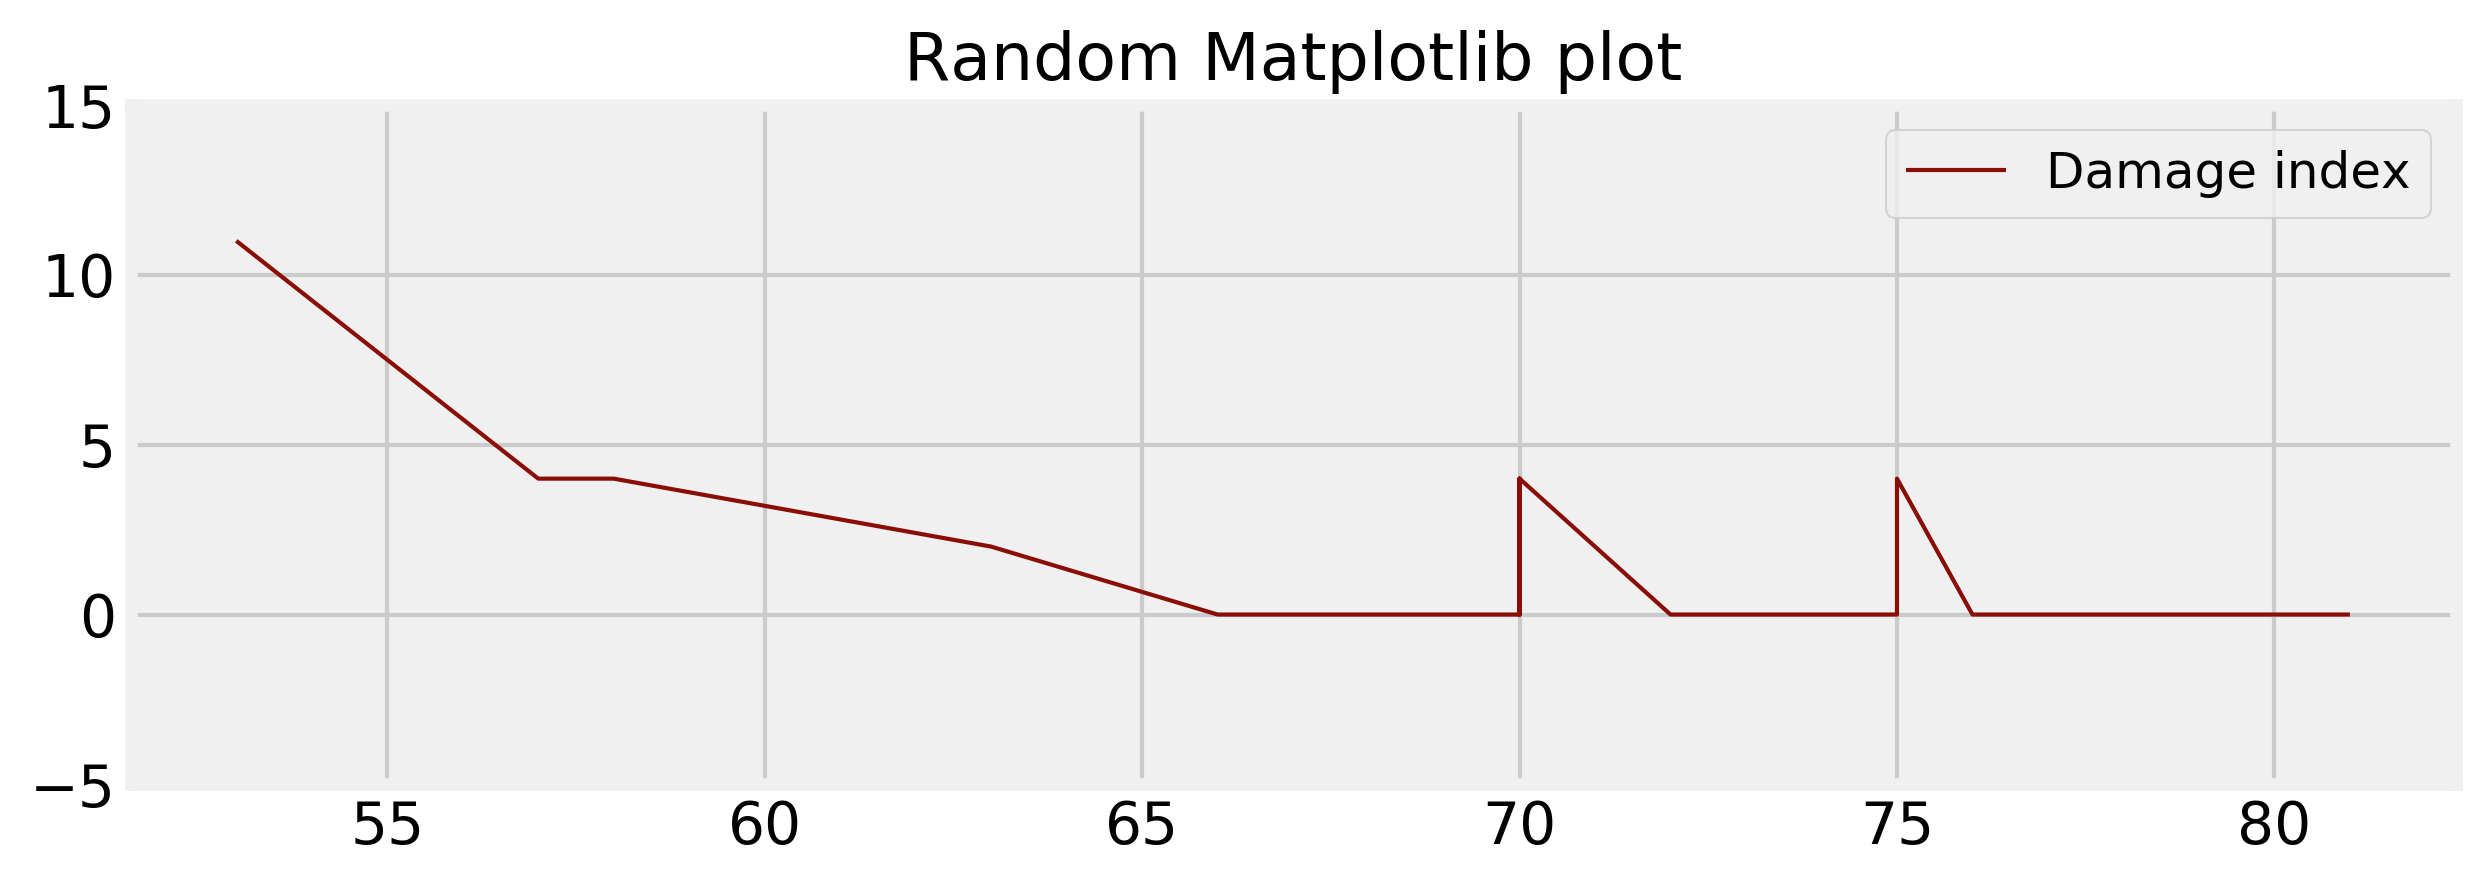

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,3), dpi=300)
plt.style.use('fivethirtyeight')
plt.ylim(-5, 15)
plt.plot(df["Temperature °F"], df["Damage index"], linestyle="-", linewidth=1, color="#8a0e06", label="Damage index");
# plt.plot(df["Temperature °F"], df["Erosion incidents"], linestyle="dotted", linewidth=1, color="#1c478c", label="Erosion incidents");
plt.title("Random Matplotlib plot", fontsize=16);
plt.legend(loc="best", fontsize=12);


In [7]:
# add linear regression
X = df.loc[:, "Temperature °F"].values.reshape(-1, 1)
Y = df.loc[:, "Damage index"].values # .values.reshape(-1, 1)
print(X.shape, type(X))
print(Y.shape, type(Y))

# print(X)
# print(Y)

(24, 1) <class 'numpy.ndarray'>
(24,) <class 'numpy.ndarray'>


In [8]:
model = LinearRegression()

In [9]:
model.fit(X,Y)

ValueError: illegal value in 4-th argument of internal None

In [ ]:
Y_pred = model.predict(X)
plt.figure(figsize=(10,3), dpi=300)
plt.style.use('fivethirtyeight')
plt.ylim(-5, 15)
plt.plot(df["Temperature °F"], df["Damage index"], linestyle="-", linewidth=1, color="#8a0e06", label="Damage index");
# plt.plot(df["Temperature °F"], df["Erosion incidents"], linestyle="dotted", linewidth=1, color="#1c478c", label="Erosion incidents");
plt.title("Random Matplotlib plot", fontsize=16);
plt.legend(loc="best", fontsize=12);
plt.plot(X, Y_pred, linestyle="dotted", linewidth=1, color="#295e37", label="linear regression");

In [ ]:
print(df.loc[0,"Temperature °F"])
print(type(df.loc[0,"Temperature °F"]))

In [ ]:
# x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# y = np.array([5, 20, 14, 32, 22, 38])

# x = np.array([53, 57, 58, 63, 66, 67]).reshape((-1, 1))
# y = np.array([11, 4, 4, 2, 0, 0])

# x = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69]).reshape((-1, 1))
# y = np.array([11, 4, 4, 2, 0, 0, 0, 0, 0, 0])

# x = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72]).reshape((-1, 1))
# y = np.array([11, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0])

# x = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76]).reshape((-1, 1))
# y = np.array([11, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0])

x = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 80, 81]).reshape((-1, 1))
y = np.array([11, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0])

In [ ]:
print(x.shape, y.shape)
print(type(x), type(y))
print(x)
print(y)

In [ ]:
print("dataframe inputs (X, Y): ", type(X), type(x))
print("manual numpy array (x, y): ", type(Y), type(y))

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
model = LinearRegression()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,3), dpi=300)
plt.style.use('fivethirtyeight')
plt.ylim(-5, 15)
plt.plot(df["Temperature °F"], df["Damage index"], linestyle="-", linewidth=1, color="#8a0e06", label="Damage index");
# plt.plot(df["Temperature °F"], df["Erosion incidents"], linestyle="dotted", linewidth=1, color="#1c478c", label="Erosion incidents");
plt.title("Random Matplotlib plot", fontsize=16);
plt.legend(loc="best", fontsize=12);

# using previous lowercase x,y inputs from above
model = LinearRegression()
model.fit(x, y)
Y_pred = model.predict(x)
plt.plot(x, Y_pred, linestyle="dotted", linewidth=1, color="#295e37", label="linear regression");

In [ ]:
model.fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(r_sq)

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
print(X==x)
print(Y==y)

# 3- Get a snapshot of the python visualization universe

